# ToyMD

## How to run the exercises
We provide the correct version of the code from last week, feel free to use it for this exercise to be sure to start from a correct code, which you will further modify in this exercise.

**How to access the corrected version of the code:** 
1. Access the NVE version of the code on Moodle ("ToyMD Code from last week" file)
2. Download the zip file
3. Upload it on the Noto repository (Ex5 folder) 
4. Unzip the file with the following command: 

In [1]:
!unzip ToyMD.zip

unzip:  cannot find or open ToyMD.zip, ToyMD.zip.zip or ToyMD.zip.ZIP.


5. Adapt permissions to be able to run the code

In [1]:
!chmod -R 700 ./ToyMD

In [1]:
import sys
sys.path.append("..")
import helpers
from helpers import *
helpers.set_style()
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis
from MDAnalysis.analysis import rdf
from scipy.spatial import distance

# Exercises

## MD Initialization and Temperature

:::{admonition} Exercise 1
:class: exercise

Implement the initialization described in the Theory section in our ToyMD code in `toy_md.py` in the section `##INITIALIZATION HERE##`. For this you should pick random velocities using `r.random.standard_normal((dim1,dim2))` which will produce random numbers between `0` and `1`. You need to shift this random gaussian distribution appropriately and then multiply it such that the width of the velocity distribution matches the kinetic energy at the target temperature. Use the variables `masses[i]` for the mass of particle `i` and Boltzmanns constant `0.00831415`. Remember that for each degree of freedom (e.g velocity in x direction) {eq}`equipart_x` holds.

:::

:::{admonition} Exercise 2
:class: exercise

Implement the Berendsen thermostat in the `toy_md.py` and `toy_md_integrate.py` (change the `compute_lambda_T` function) files. 

:::

:::{admonition} Exercise 3
:class: exercise

A better thermostat is the Andersen thermostat. It can be implemented as follows. Describe what problems this thermostat will present to us e.g for sampling of diffusion coefficients. What advantage does this thermostat have compared to the Berendsen thermostat?
</div>


``` python
#Andersen Thermostat
for i in range(N):
    if (r.random()<float(md_params["tau-T"])*float(md_params['time-step'])):# pick random particles according to nu
        sd=np.sqrt(0.00831415*float(md_params['temperature'])/masses[i])  # Velocity distribution at target temperature
        velocities[i]=0+np.random.randn(1,3)*sd # set new random velocities
```
:::

## Force field


Now we can run a MD simulation in our desired NVT ensemble using our code on simple systems. Let's simulate a box of CO2 molecules. <br>
Investigate the `force_field.txt` file in the `carbon-dioxide` folder and then run a short molecular dynamics simulation using the following parameters:

```
number-of-steps  2000 # Number of integration time steps
time-step        0.001  # Integration time step (picoseconds)
temperature      50  # Simulation temperature
tau-T            0.05 # Temperature coupling time (picoseconds)
output-frequency  10   # Store coordinates every N steps

```

The simulation is run using the following command.
Make sure to correctly adapt the path to the `toy_md.py` code and the input files.

In [ ]:
!path/to/toy_md.py -c path/to/co2.pdb -p path/to/params.txt -f path/to/force_field.txt -o path/to/co2-traj.pdb -w path/to/co2-final.pdb

where `co2-traj.pdb` is a trajectory written each `output-frequency` steps and `co2-final.pdb` is the final geometry after the simulation has run the specified number of steps. 

:::{admonition} Exercise 4
:class: exercise

Visualize the trajectory and visualize the distance of a C-O bond using the code cells below. 
Explain the fluctuations that you observe. What does the average value correspond to?

:::

### Visualization of the trajectory

Here you can visualize the trajectory to see if your simulation is running correctly. A quick visualization often highlights if the parameters/simulation are correct.

In [53]:
# ADJUST THE PATHS AS NECESSARY TO MATCH THE NAME OF YOUR FOLDERS
traj = MDAnalysis.Universe('./ToyMD/carbon-dioxide/traj.pdb')
show_trajectory(traj)

In [54]:
carbon = traj.select_atoms("resid 1 and name C")
oxygen1 = traj.select_atoms("resid 1 and name O1")

carbon = traj.select_atoms("resid 1 and name C")
oxygen2 = traj.select_atoms("resid 1 and name O2")

In [55]:
oxygen1.positions

array([[22.04, 14.37,  2.68]], dtype=float32)

In [56]:
carbon_oxygen1_dist = []
carbon_oxygen2_dist = []
for ts in traj.trajectory:
    carbon_oxygen1_dist.append(distance.euclidean(carbon.positions[0], oxygen1.positions[0]))
    carbon_oxygen2_dist.append(distance.euclidean(carbon.positions[0], oxygen2.positions[0]))

forcefield = 1.2  #check force_field.txt in ToyMD folder for this value # modify here
# CO bond length is 0.12 nm as in the force_field.txt. So it is 1.2 Angstrom

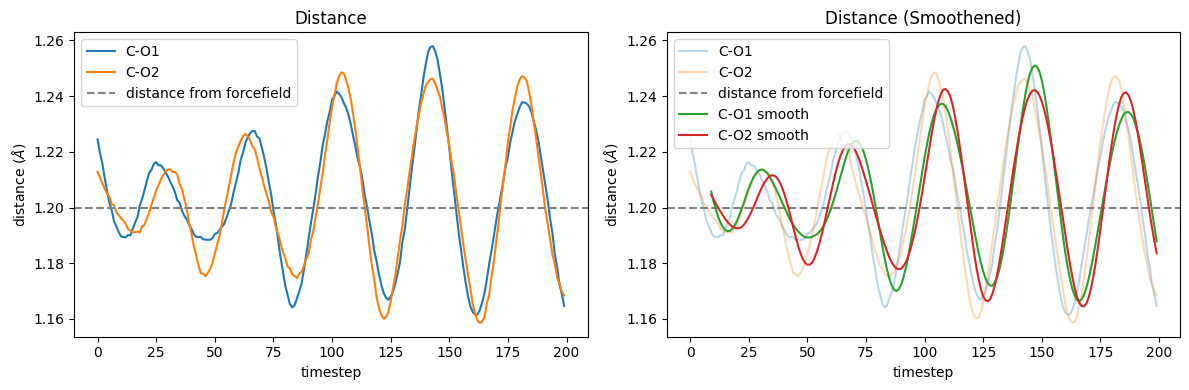

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(carbon_oxygen1_dist, label="C-O1")
ax[0].plot(carbon_oxygen2_dist, label="C-O2")
ax[0].axhline(forcefield, label="distance from forcefield", color='gray', linestyle='--')
ax[0].set_xlabel("timestep")
ax[0].set_ylabel(r'distance ($\AA$)')
ax[0].set_title('Distance')
ax[0].legend()

ax[1].plot(carbon_oxygen1_dist, alpha=0.3, label="C-O1")
ax[1].plot(carbon_oxygen2_dist, alpha=0.3, label="C-O2")
ax[1].axhline(forcefield, label="distance from forcefield", color='gray', linestyle='--')
ax[1].set_xlabel("timestep")
ax[1].set_ylabel(r'distance ($\AA$)')
ax[1].set_title('Distance (Smoothened)')

avg_points = 10
move_avg = np.convolve(carbon_oxygen1_dist, np.ones(avg_points), 'valid') / avg_points
ind = np.arange(avg_points-1, len(carbon_oxygen1_dist))
ax[1].plot(ind, move_avg, label="C-O1 smooth")

move_avg = np.convolve(carbon_oxygen2_dist, np.ones(avg_points), 'valid') / avg_points
ind = np.arange(avg_points-1, len(carbon_oxygen2_dist))
ax[1].plot(ind, move_avg, label="C-O2 smooth")

ax[1].legend()

plt.tight_layout()
plt.savefig('vis_traj_co2_tau_4_dt_4')
plt.show()

In [58]:
print(f"Average C-O1 bond length: {np.mean(carbon_oxygen1_dist):.3f} Å")
print(f"Average C-O2 bond length: {np.mean(carbon_oxygen2_dist):.3f} Å")

Average C-O1 bond length: 1.204 Å
Average C-O2 bond length: 1.203 Å


:::{admonition} Exercise 5
:class: exercise

Visualize the radial distribution function of this system using below code. What do you observe?
:::

### Compute RDF

We can use the `MDAnalysis` library to compute the radial distribution function.


In [59]:
oxygens = traj.select_atoms("name O1" or "name 02")
carbons = traj.select_atoms("name C")

In [60]:
rdf = MDAnalysis.analysis.rdf.InterRDF(carbons, oxygens)
rdf.run()

/home/gopald/Documents/jetix/lib/python3.10/site-packages/MDAnalysis/analysis/base.py:522: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[idx] = ts.time


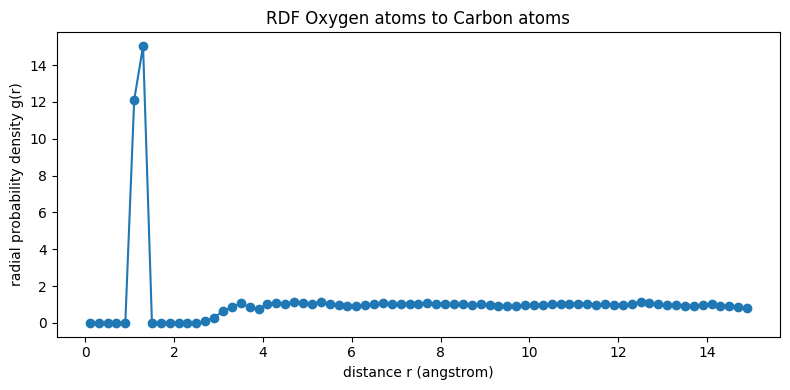

In [61]:
fix, ax = plt.subplots(figsize=(8, 4))
plt.plot(rdf.results.bins, rdf.results.rdf, marker='o')
ax.set_xlabel('distance r (angstrom)')
ax.set_ylabel('radial probability density g(r)')
ax.set_title('RDF Oxygen atoms to Carbon atoms')
plt.tight_layout()
plt.savefig('rdf_tau_4_dt_4')
plt.show()

:::{admonition} Bonus Exercise 6
:class: exercise

How would the radial distribution function look like for a heterogenous selection? Below is the code for plotting the RDF of solvent vs different amino acids in a solvated protein (GB1) system. Based on the plot you generate, discuss the difference in solvation patterns around the phenylalanine (F) amino acid sites and around the aspartate (D) amino acid sites. Why do you think these differences exist? Take a look on the PDB Data Bank site to view the relative positions of these amino acids: <a href="https://www.rcsb.org/3d-view/2J52">3D GB1</a>

:::

In [11]:
traj_gb1 = MDAnalysis.Universe('./_ToyMD/carbon-dioxide/gb1.pdb')

In [12]:
#selection of different groups of atoms to compare
#select the solvent atoms 
solvent = traj_gb1.select_atoms("resname WAT")
#selects the atoms which run along the protein sequence (nitrogen, alpha-carbon, carbon)
solute_backbone = traj_gb1.select_atoms("backbone")
#select the atoms which comprise the specific amino acids
solute_PHE = traj_gb1.select_atoms("resname PHE")
solute_ASP = traj_gb1.select_atoms("resname ASP")

In [13]:
rdf0 =  MDAnalysis.analysis.rdf.InterRDF(solvent, solute_backbone)
rdf0.run()
rdf1 = MDAnalysis.analysis.rdf.InterRDF(solvent, solute_PHE)
rdf1.run()
rdf2 = MDAnalysis.analysis.rdf.InterRDF(solvent, solute_ASP)
rdf2.run()

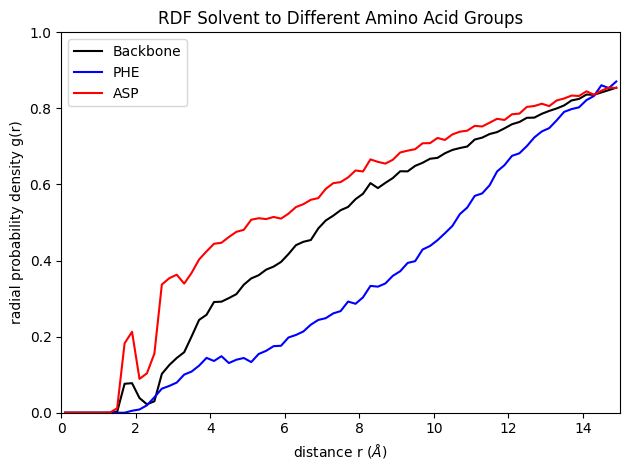

In [18]:
fix, ax = plt.subplots()

plt.plot(rdf0.results.bins, rdf0.results.rdf, color="black", label="Backbone")
plt.plot(rdf1.results.bins, rdf1.results.rdf, color="blue", label="PHE")
plt.plot(rdf2.results.bins, rdf2.results.rdf, color="red", label="ASP")

ax.set_xlabel('distance r ($\AA$)')
ax.set_ylabel('radial probability density g(r)')
ax.set_title('RDF Solvent to Different Amino Acid Groups')
ax.set_xlim(0,15)
ax.set_ylim(0,1)
ax.legend()

plt.tight_layout()
plt.savefig('rdf_hetero')

plt.show()

## Timestep and coupling

:::{admonition} Exercise 7
:class: exercise

Test the influence of the coupling parameter $\tau$ and timestep $dt$. 
Test the combinations of:
- large $\tau$ and small $dt$
- large $dt$ and small $\tau$ 
- very large $dt$ and $\tau$ 

For some of these settings the system may explode (you can see that because really high energies and temperatures are reached and the simulation gets stuck). If this is the case, you will not be able to complete the simulation, but you can just restart the notebook and use new parameters. **In your report, even for those parameters add a comment and explain the behaviour you observe**.

**Hint**: To check the influence of the coupling parameter $\tau$, you can plot the instantaneous temperatures for several runs using different $\tau$ values.   
For this, you need to rename the `logfile` produced after running `toy_md` (to avoid overwritting it with the next run). You can do this by executing this command on the terminal: `cp <path_to_logfile>/logfile <path_to_logfile>/logfile_tau_<value_of_tau>`. To then read the temperatures from each `logfile`, you can use the function `read_temperatures` shown below.

Note that the code cell for plotting already suggests you a possible set of values of $\tau$ and $dt$, adapt the values of the parameters and plot different/more curves.

:::

The simulation is run using the following command (for this test, you can run a shorter simulation, i.e. decreasing the number of steps).
Make sure to correctly adapt the path to the `toy_md.py` code and the input files.

In [ ]:
!path/to/toy_md.py -c path/to/co2.pdb -p path/to/params.txt -f path/to/force_field.txt -o path/to/co2-traj.pdb -w path/to/co2-final.pdb

In [ ]:
!cp path/to/logfile path/to/logfile_tau_<value_of_tau>_dt_<value_of_dt>

In [62]:
def read_temperatures(
    logfile_path: str,
) -> list:
    """
    Read temperatures from logfile and return as list.
    Args:
        logfile_path (str): path of logfile
    Returns:
        temps (list): list of temperatures for every simulation step
    """
    with open(logfile_path) as f:
        logfile = f.readlines()

    temps = [float(line.split(',')[4]) for line in logfile[1:] if line[0:5]!='step:']
    return temps

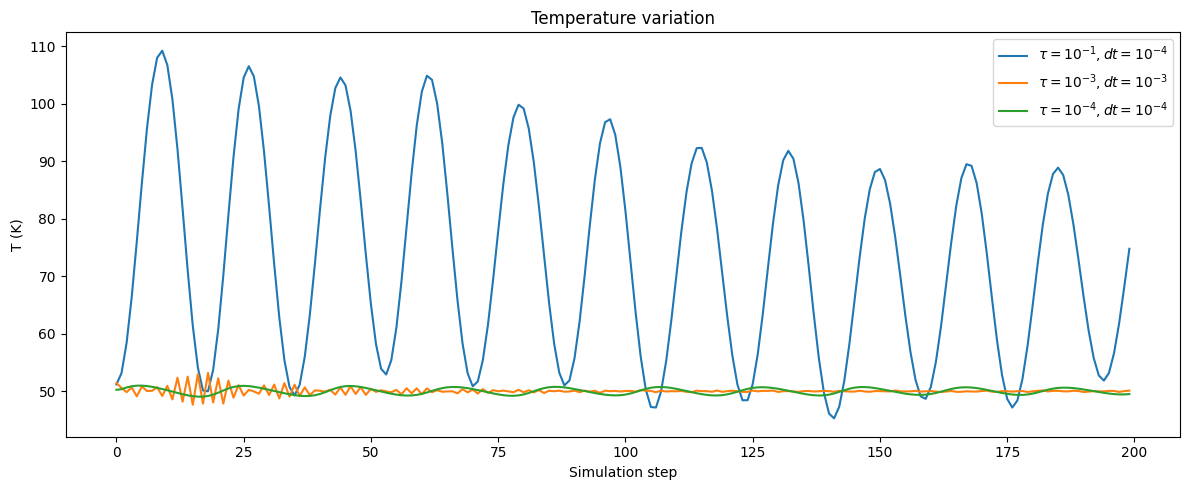

In [64]:
# Code for plotting the instantaneous temperatures for several runs using different $\tau$ values.

# Read temperatures
temps_1 = read_temperatures(logfile_path = './ToyMD/carbon-dioxide/logfile_tau_1_dt_4') # modify logfile_path with the path to your files!
# Add here similar lines for reading log files from simualtions with different parameters
temps_2 = read_temperatures(logfile_path = './ToyMD/carbon-dioxide/logfile_tau_3_dt_3') # modify logfile_path with the path to your files!

temps_3 = read_temperatures(logfile_path = './ToyMD/carbon-dioxide/logfile_tau_4_dt_4') # modify logfile_path with the path to your files!
# temps_2 = read_temperatures(logfile_path = './ToyMD/carbon-dioxide/logfile_tau_1_dt_1') # modify logfile_path with the path to your files!

fig, ax =plt.subplots(1, figsize=(12, 5))

ax.plot(temps_1, label=r'$\tau = 10^{-1}, dt = 10^{-4}$')
ax.plot(temps_2, label=r'$\tau = 10^{-3}, dt = 10^{-3}$')
ax.plot(temps_3, label=r'$\tau = 10^{-4}, dt = 10^{-4}$')
# ax.plot(temps_1, label=r'$\tau = 10^{-1}, dt = 10^{-1}$')
# Add here similar lines for reading log files from simualtions with different parameters

ax.set_xlabel(r"Simulation step")
ax.set_ylabel(r"T (K)")
ax.set_title('Temperature variation')
plt.legend()
plt.tight_layout()
plt.savefig('temp_var')
plt.show()